# **`Northwind Traders`**

## **Database**<br>
The Northwind database is a sample database that was originally created by Microsoft and used as the basis for their tutorials in a variety of database products for decades. The Northwind database contains the sales data for a fictitious company called “Northwind Traders,” which imports and exports specialty foods from around the world. The Northwind database is an excellent tutorial schema for a small-business ERP, with customers, orders, inventory, purchasing, suppliers, shipping, employees, and single-entry accounting.

**Source** : https://drive.google.com/drive/folders/1fTHrwh_gcLsOFKXHnUzUGEu_APxLoD9i

**Tables Information :**
- Suppliers : Suppliers and vendors of Northwind
- Customers : Customers who buy products from Northwind
- Employees : Employee details of Northwind traders
- Products : Product information
- Shippers : The details of the shippers who ship the products from the traders to the end-customers
- Orders and Order_Details : Sales Order transactions taking place between the customers & the company

**Northwind - Entity Relationship Diagram** :

![erd](northwind_erd.png)

## **`Products Analyzing :`**
1. Find and define the most selling products, to maintain product stock available
1. Find and define the most customer company, based on their orders for better handling in future orders
1. Find and define the most supplier company, based on their orders for better handling in future orders
1. Find and define the most customer country, to manage sales and best shipper company for shiping process 
1. Find and define the most supplier country, to manage sales and best shipper company for shiping process 

**Modules and Library**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector as sqlcon
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import pylab
from scipy.stats import shapiro

### **Database Connection**

In [3]:
mydb = sqlcon.connect(
    host = 'localhost',
    user = 'root',
    passwd = 'admin',
    database = 'northwind'
)

In [4]:
mycursor = mydb.cursor()

def query(yourQuery) :
    mycursor.execute(yourQuery)
    myresult = mycursor.fetchall()
    df = pd.DataFrame(myresult, columns = mycursor.column_names)
    return df

### **Data Details**

Take columns from few tables within `Products`, `Categories`, `Suppliers`, `OrdersDetails` and `Customers`. Need Foreign Key (CustomerID) from  `Orders` to connect `Customers` Tables.

Retrieve Data from Tables :
- ProductName from Products
- QuantityPerUnit from Products
- UnitPrice from Products
- UnitsInStock from Products
- UnitsOnOrder from Products
- CategoryName from Categories
- TotalOrderQuantity from OrderDetails
- CompanyName from Customers
- City from Customers
- Country from Customers
- CompanyName from Suppliers
- City from Suppliers
- Country from Suppliers

The Queries will create for retrieve all specifics columns from different tables and transform in DataFrame for further analysis process.

In [5]:
df = query(
    '''
    SELECT P.ProductName, P.QuantityPerUnit, ROUND(P.UnitPrice,2) UnitPrice, P.UnitsInStock, P.UnitsOnOrder,
    CT.CategoryName Category,
    CS.CompanyName CustomerCompany, CS.City CustomerCity, CS.Country CustomerCountry,
    SUM(OD.Quantity) TotalOrderQuantity, 
    S.CompanyName SupplierCompany, S.City SupplierCity, S.Country SupplierCountry
    FROM Products P
    LEFT JOIN Categories CT ON P.CategoryID = CT.CategoryID
    LEFT JOIN Suppliers S ON P.SupplierID = S.SupplierID
    LEFT JOIN OrderDetails OD ON P.ProductID = OD.ProductID
    LEFT JOIN Orders O ON OD.OrderID = O.OrderID
    LEFT JOIN Customers CS ON O.CustomerID = CS.CustomerID
    WHERE P.Discontinued = 0
    GROUP BY P.ProductID;
    '''
)

Raw Data Preview

In [6]:
df.sample(5)

,ProductName,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,Category,CustomerCompany,CustomerCity,CustomerCountry,TotalOrderQuantity,SupplierCompany,SupplierCity,SupplierCountry
35,Ipoh Coffee,16 - 500 g tins,46.00,17,10,Beverages,Wartian Herkku,Oulu,Finland,580,Leka Trading,Singapore,Singapore
65,Longlife Tofu,5 kg pkg.,10.00,4,20,Produce,Chop-suey Chinese,Bern,Switzerland,297,Tokyo Traders,Tokyo,Japan
36,Gula Malacca,20 - 2 kg bags,19.45,27,0,Condiments,Berglunds snabbkp,Lule,Sweden,601,Leka Trading,Singapore,Singapore
16,Sir Rodney's Marmalade,30 gift boxes,81.00,40,0,Confections,Suprmes dlices,Charleroi,Belgium,313,"Specialty Biscuits, Ltd.",Manchester,UK
6,Northwoods Cranberry Sauce,12 - 12 oz jars,40.00,6,0,Condiments,White Clover Markets,Seattle,USA,372,Grandma Kelly's Homestead,Ann Arbor,USA


## **Data Manipulation**

**Data Anomalies**<br>
This analysis focus on `Products` Analysis, before that process some data cleaning must be handle to meet great condition. 

Check Data Info

In [7]:
df.shape

(69, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ProductName         69 non-null     object
 1   QuantityPerUnit     69 non-null     object
 2   UnitPrice           69 non-null     object
 3   UnitsInStock        69 non-null     int64 
 4   UnitsOnOrder        69 non-null     int64 
 5   Category            69 non-null     object
 6   CustomerCompany     69 non-null     object
 7   CustomerCity        69 non-null     object
 8   CustomerCountry     69 non-null     object
 9   TotalOrderQuantity  69 non-null     object
 10  SupplierCompany     69 non-null     object
 11  SupplierCity        69 non-null     object
 12  SupplierCountry     69 non-null     object
dtypes: int64(2), object(11)
memory usage: 7.1+ KB


The data have 69 rows and 13 columns.<br>
Found `UnitPrice` and `TotalOrderQuantity` shown incorrect data type. data type correction will be process

### **Data Type**

Convert Data Type

In [9]:
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'])
df['TotalOrderQuantity'] = pd.to_numeric(df['TotalOrderQuantity'])

Check Converted Data Type

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ProductName         69 non-null     object 
 1   QuantityPerUnit     69 non-null     object 
 2   UnitPrice           69 non-null     float64
 3   UnitsInStock        69 non-null     int64  
 4   UnitsOnOrder        69 non-null     int64  
 5   Category            69 non-null     object 
 6   CustomerCompany     69 non-null     object 
 7   CustomerCity        69 non-null     object 
 8   CustomerCountry     69 non-null     object 
 9   TotalOrderQuantity  69 non-null     float64
 10  SupplierCompany     69 non-null     object 
 11  SupplierCity        69 non-null     object 
 12  SupplierCountry     69 non-null     object 
dtypes: float64(2), int64(2), object(9)
memory usage: 7.1+ KB


### **Missing Values**

In [11]:
df.isna().sum()

ProductName           0
QuantityPerUnit       0
UnitPrice             0
UnitsInStock          0
UnitsOnOrder          0
Category              0
CustomerCompany       0
CustomerCity          0
CustomerCountry       0
TotalOrderQuantity    0
SupplierCompany       0
SupplierCity          0
SupplierCountry       0
dtype: int64

Missing Value Not Found (No Action Required)

### **Duplicate Data**

In [12]:
df[df.duplicated()]

,ProductName,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,Category,CustomerCompany,CustomerCity,CustomerCountry,TotalOrderQuantity,SupplierCompany,SupplierCity,SupplierCountry


In [13]:
df.duplicated().sum()

0

Duplicate Data Not Found (No Action Required)

Cleaned Data Preview

In [14]:
df.sample(10)

,ProductName,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,Category,CustomerCompany,CustomerCity,CustomerCountry,TotalOrderQuantity,SupplierCompany,SupplierCity,SupplierCountry
61,Outback Lager,24 - 355 ml bottles,15.00,15,10,Beverages,Ottilies Kseladen,Kln,Germany,817.0,"Pavlova, Ltd.",Melbourne,Australia
9,Queso Manchego La Pastora,10 - 500 g pkgs.,38.00,86,0,Dairy Products,Wartian Herkku,Oulu,Finland,344.0,Cooperativa de Quesos 'Las Cabras',Oviedo,Spain
17,Sir Rodney's Scones,24 pkgs. x 4 pieces,10.00,3,40,Confections,Centro comercial Moctezuma,Mxico D.F.,Mexico,1016.0,"Specialty Biscuits, Ltd.",Manchester,UK
47,Gnocchi di nonna Alice,24 - 250 g pkgs.,38.00,21,10,Grains/Cereals,Rattlesnake Canyon Grocery,Albuquerque,USA,1263.0,Pasta Buttini s.r.l.,Salerno,Italy
28,Steeleye Stout,24 - 12 oz bottles,18.00,20,0,Beverages,Que Delcia,Rio de Janeiro,Brazil,883.0,Bigfoot Breweries,Bend,USA
34,Jack's New England Clam Chowder,12 - 12 oz cans,9.65,85,0,Seafood,Hanari Carnes,Rio de Janeiro,Brazil,981.0,New England Seafood Cannery,Boston,USA
2,Aniseed Syrup,12 - 550 ml bottles,10.00,13,70,Condiments,B's Beverages,London,UK,328.0,Exotic Liquids,London,UK
42,Valkoinen suklaa,12 - 100 g bars,16.25,65,0,Confections,La maison d'Asie,Toulouse,France,235.0,Karkki Oy,Lappeenranta,Finland
59,Scottish Longbreads,10 boxes x 8 pieces,12.50,6,10,Confections,Reggiani Caseifici,Reggio Emilia,Italy,799.0,"Specialty Biscuits, Ltd.",Manchester,UK
52,Sirop d'rable,24 - 500 ml bottles,28.50,113,0,Condiments,QUICK-Stop,Cunewalde,Germany,603.0,Forts d'rables,Ste-Hyacinthe,Canada


#### **Cleaned Data Summary**

In [15]:
summary = []
for i in df.columns :
    summary.append([i, df[i].dtype, len(df),df[i].isna().sum(), df[i].nunique(), list(df[i].sample().values)])

tabel1Desc = pd.DataFrame(
    columns = ['Column Name','Data Type','Data Count','Missing Value', 'Number of Unique','Unique Sample'], data = summary
)
tabel1Desc

,Column Name,Data Type,Data Count,Missing Value,Number of Unique,Unique Sample
0,ProductName,object,69,0,69,[Sir Rodney's Marmalade]
1,QuantityPerUnit,object,69,0,62,[24 - 50 g pkgs.]
2,UnitPrice,float64,69,0,55,[10.0]
3,UnitsInStock,int64,69,0,51,[22]
4,UnitsOnOrder,int64,69,0,10,[0]
5,Category,object,69,0,8,[Beverages]
6,CustomerCompany,object,69,0,34,[Ricardo Adocicados]
7,CustomerCity,object,69,0,29,[Graz]
8,CustomerCountry,object,69,0,16,[Germany]
9,TotalOrderQuantity,float64,69,0,64,[328.0]


From this summary tables, the data remains great!

## **Statistics**

**Data Overview**

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UnitPrice,69.0,26.734348,32.464316,2.5,13.0,19.0,31.23,263.5
UnitsInStock,69.0,43.739130,36.591003,0.0,17.0,29.0,65.00,125.0
UnitsOnOrder,69.0,11.304348,24.187566,0.0,0.0,0.0,0.00,100.0
TotalOrderQuantity,69.0,666.898551,331.170924,122.0,404.0,623.0,828.00,1577.0


**Data Correlation & Relationship**

In [62]:
df.corr()

,UnitPrice,UnitsInStock,UnitsOnOrder,TotalOrderQuantity
UnitPrice,1.000000,-0.137242,-0.121270,0.007396
UnitsInStock,-0.137242,1.000000,-0.432122,-0.007497
UnitsOnOrder,-0.121270,-0.432122,1.000000,-0.141641
TotalOrderQuantity,0.007396,-0.007497,-0.141641,1.000000


In [84]:
df.corr('spearman')

,UnitPrice,UnitsInStock,UnitsOnOrder,TotalOrderQuantity
UnitPrice,1.000000,-0.080861,-0.122944,0.014198
UnitsInStock,-0.080861,1.000000,-0.645646,-0.015442
UnitsOnOrder,-0.122944,-0.645646,1.000000,-0.109546
TotalOrderQuantity,0.014198,-0.015442,-0.109546,1.000000


In [83]:
norm, pval = shapiro(df['UnitsInStock'])

if pval < 0.05 :
    print (f'Reject H0, P-Value ({pval} < 5%)')
    print ('Non-Nromal Distribution Data')
else :
    print (f'Failing to Reject H0, P-Value ({pval} > 5%)')
    print ('Normal Distribution Data')

Reject H0, P-Value (2.1574289803538704e-06 < 5%)
Non-Nromal Distribution Data


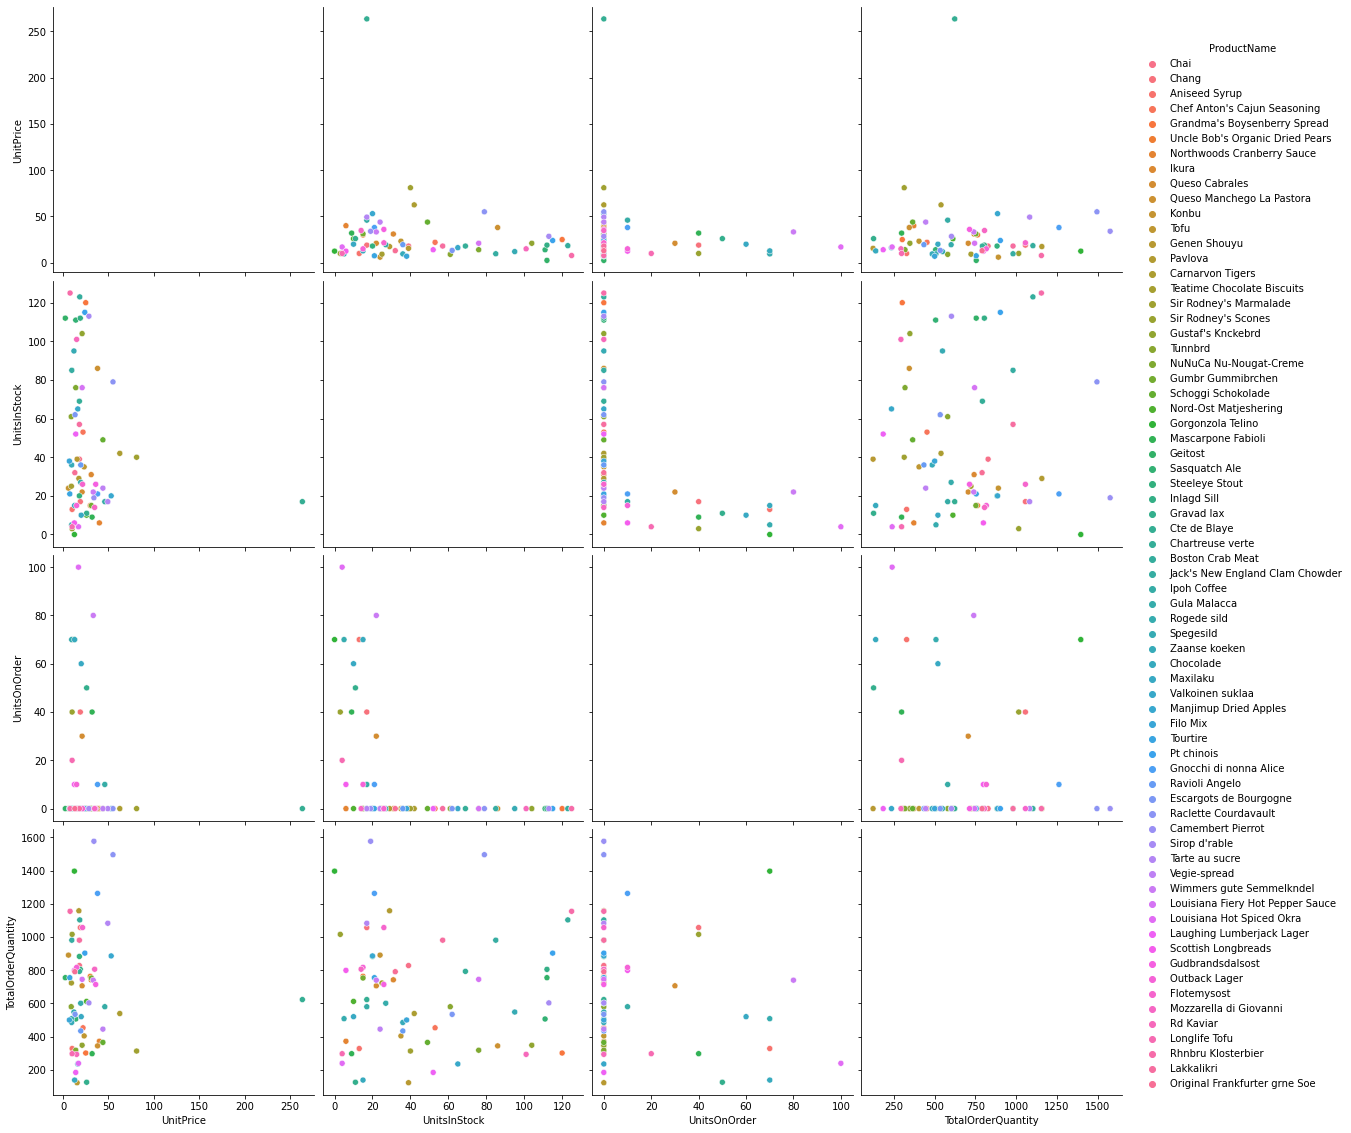

In [19]:
sns.pairplot(df, hue='ProductName', height=4)
plt.show()

**Unit Price**

In [20]:
df.sort_values('UnitPrice', ascending=True).head()

,ProductName,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,Category,CustomerCompany,CustomerCity,CustomerCountry,TotalOrderQuantity,SupplierCompany,SupplierCity,SupplierCountry
26,Geitost,500 g,2.50,112,0,Dairy Products,Suprmes dlices,Charleroi,Belgium,755.0,Norske Meierier,Sandvika,Norway
10,Konbu,2 kg box,6.00,24,0,Seafood,Tortuga Restaurante,Mxico D.F.,Mexico,891.0,Mayumi's,Osaka,Japan
44,Filo Mix,16 - 2 kg boxes,7.00,38,0,Grains/Cereals,Pericles Comidas clsicas,Mxico D.F.,Mexico,500.0,"G'day, Mate",Sydney,Australia
45,Tourtire,16 pies,7.45,21,0,Meat/Poultry,Reggiani Caseifici,Reggio Emilia,Italy,755.0,Ma Maison,Montral,Canada
66,Rhnbru Klosterbier,24 - 0.5 l bottles,7.75,125,0,Beverages,Berglunds snabbkp,Lule,Sweden,1155.0,Plutzer Lebensmittelgromrkte AG,Frankfurt,Germany


In [21]:
q1 = df['UnitPrice'].describe()['25%']
q3 = df['UnitPrice'].describe()['75%']
iqr = q3 - q1

outlierIndex = df[(df['UnitPrice'] < q1 - (1.5 * iqr)) | (df['UnitPrice']> q3 + (1.5 * iqr)) ].index
df.loc[outlierIndex]

,ProductName,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,Category,CustomerCompany,CustomerCity,CustomerCountry,TotalOrderQuantity,SupplierCompany,SupplierCity,SupplierCountry
14,Carnarvon Tigers,16 kg pkg.,62.5,42,0,Seafood,Tortuga Restaurante,Mxico D.F.,Mexico,539.0,"Pavlova, Ltd.",Melbourne,Australia
16,Sir Rodney's Marmalade,30 gift boxes,81.0,40,0,Confections,Suprmes dlices,Charleroi,Belgium,313.0,"Specialty Biscuits, Ltd.",Manchester,UK
31,Cte de Blaye,12 - 75 cl bottles,263.5,17,0,Beverages,Split Rail Beer & Ale,Lander,USA,623.0,Aux joyeux ecclsiastiques,Paris,France


In [22]:
# print('Outliers in UnitPrice :', (outlierIndex.shape[0]))

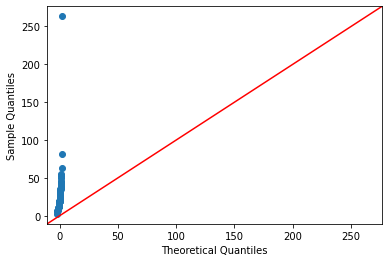

In [23]:
sm.qqplot(df['UnitPrice'], line='45')
pylab.show()

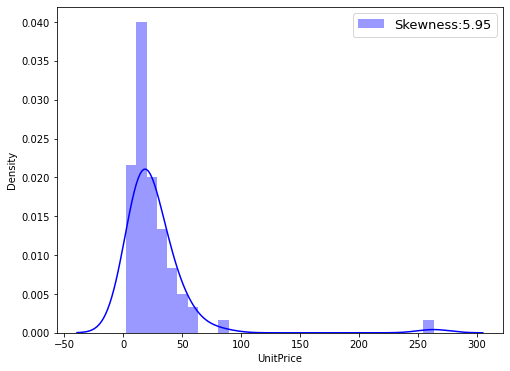

In [24]:
plt.figure(figsize=(8,6))
sns.distplot(df['UnitPrice'], label='Skewness:%.2f'%(df['UnitPrice'].skew()), color='blue')
plt.legend(loc = 0, fontsize = 13)
plt.show()

Outliers in UnitPrice : 3<br>
From above visualization, confirmed the data shown is non-normal distribution in other word right skewed. In this situation the outliers is reasonable based on UnitPrice

**Units In Stock**

In [25]:
df.sort_values('UnitsInStock', ascending=True).head()

,ProductName,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,Category,CustomerCompany,CustomerCity,CustomerCountry,TotalOrderQuantity,SupplierCompany,SupplierCity,SupplierCountry
24,Gorgonzola Telino,12 - 100 g pkgs,12.5,0,70,Dairy Products,Hanari Carnes,Rio de Janeiro,Brazil,1397.0,Formaggi Fortini s.r.l.,Ravenna,Italy
17,Sir Rodney's Scones,24 pkgs. x 4 pieces,10.0,3,40,Confections,Centro comercial Moctezuma,Mxico D.F.,Mexico,1016.0,"Specialty Biscuits, Ltd.",Manchester,UK
65,Longlife Tofu,5 kg pkg.,10.0,4,20,Produce,Chop-suey Chinese,Bern,Switzerland,297.0,Tokyo Traders,Tokyo,Japan
57,Louisiana Hot Spiced Okra,24 - 8 oz jars,17.0,4,100,Condiments,Magazzini Alimentari Riuniti,Bergamo,Italy,239.0,New Orleans Cajun Delights,New Orleans,USA
37,Rogede sild,1k pkg.,9.5,5,70,Seafood,Seven Seas Imports,London,UK,508.0,Lyngbysild,Lyngby,Denmark


In [26]:
q1 = df['UnitsInStock'].describe()['25%']
q3 = df['UnitsInStock'].describe()['75%']
iqr = q3 - q1

outlierIndex = df[(df['UnitsInStock'] < q1 - (1.5 * iqr)) | (df['UnitsInStock']> q3 + (1.5 * iqr)) ].index
df.loc[outlierIndex]

,ProductName,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,Category,CustomerCompany,CustomerCity,CustomerCountry,TotalOrderQuantity,SupplierCompany,SupplierCity,SupplierCountry


In [27]:
# print('Outliers in UnitsInStock :', (outlierIndex.shape[0]))

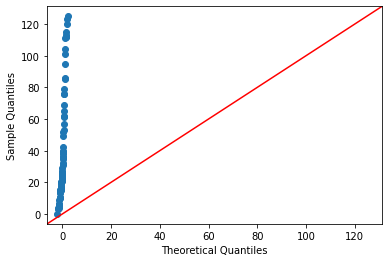

In [28]:
sm.qqplot(df['UnitsInStock'], line='45')
pylab.show()

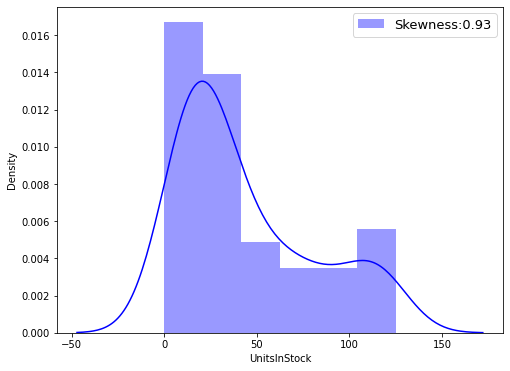

In [29]:
plt.figure(figsize=(8,6))
sns.distplot(df['UnitsInStock'], label='Skewness:%.2f'%(df['UnitsInStock'].skew()), color='blue')
plt.legend(loc = 0, fontsize = 13)
plt.show()

Outliers in UnitsInStock : 0<br>
From above visualization, confirmed the data shown is non-normal distribution in other word right skewed. In this situation the outliers is reasonable based on UnitsInStock

**UnitsOnOrder**

In [30]:
df.sort_values('UnitsOnOrder', ascending=True).head()

,ProductName,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,Category,CustomerCompany,CustomerCity,CustomerCountry,TotalOrderQuantity,SupplierCompany,SupplierCity,SupplierCountry
0,Chai,10 boxes x 20 bags,18.00,39,0,Beverages,QUICK-Stop,Cunewalde,Germany,828.0,Exotic Liquids,London,UK
32,Chartreuse verte,750 cc per bottle,18.00,69,0,Beverages,Hanari Carnes,Rio de Janeiro,Brazil,793.0,Aux joyeux ecclsiastiques,Paris,France
33,Boston Crab Meat,24 - 4 oz tins,18.40,123,0,Seafood,Frankenversand,Mnchen,Germany,1103.0,New England Seafood Cannery,Boston,USA
67,Lakkalikri,500 ml,18.00,57,0,Beverages,Frankenversand,Mnchen,Germany,981.0,Karkki Oy,Lappeenranta,Finland
36,Gula Malacca,20 - 2 kg bags,19.45,27,0,Condiments,Berglunds snabbkp,Lule,Sweden,601.0,Leka Trading,Singapore,Singapore


In [31]:
q1 = df['UnitsOnOrder'].describe()['25%']
q3 = df['UnitsOnOrder'].describe()['75%']
iqr = q3 - q1

outlierIndex = df[(df['UnitsOnOrder'] < q1 - (1.5 * iqr)) | (df['UnitsOnOrder']> q3 + (1.5 * iqr)) ].index
df.loc[outlierIndex]

,ProductName,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,Category,CustomerCompany,CustomerCity,CustomerCountry,TotalOrderQuantity,SupplierCompany,SupplierCity,SupplierCountry
1,Chang,24 - 12 oz bottles,19.00,17,40,Beverages,Richter Supermarkt,Genve,Switzerland,1057.0,Exotic Liquids,London,UK
2,Aniseed Syrup,12 - 550 ml bottles,10.00,13,70,Condiments,B's Beverages,London,UK,328.0,Exotic Liquids,London,UK
8,Queso Cabrales,1 kg pkg.,21.00,22,30,Dairy Products,Vins et alcools Chevalier,Reims,France,706.0,Cooperativa de Quesos 'Las Cabras',Oviedo,Spain
17,Sir Rodney's Scones,24 pkgs. x 4 pieces,10.00,3,40,Confections,Centro comercial Moctezuma,Mxico D.F.,Mexico,1016.0,"Specialty Biscuits, Ltd.",Manchester,UK
24,Gorgonzola Telino,12 - 100 g pkgs,12.50,0,70,Dairy Products,Hanari Carnes,Rio de Janeiro,Brazil,1397.0,Formaggi Fortini s.r.l.,Ravenna,Italy
25,Mascarpone Fabioli,24 - 200 g pkgs.,32.00,9,40,Dairy Products,Ernst Handel,Graz,Austria,297.0,Formaggi Fortini s.r.l.,Ravenna,Italy
30,Gravad lax,12 - 500 g pkgs.,26.00,11,50,Seafood,Centro comercial Moctezuma,Mxico D.F.,Mexico,125.0,Svensk Sjfda AB,Stockholm,Sweden
35,Ipoh Coffee,16 - 500 g tins,46.00,17,10,Beverages,Wartian Herkku,Oulu,Finland,580.0,Leka Trading,Singapore,Singapore
37,Rogede sild,1k pkg.,9.50,5,70,Seafood,Seven Seas Imports,London,UK,508.0,Lyngbysild,Lyngby,Denmark
40,Chocolade,10 pkgs.,12.75,15,70,Confections,Ernst Handel,Graz,Austria,138.0,Zaanse Snoepfabriek,Zaandam,Netherlands


In [32]:
# print('Outliers in UnitsOnOrder :', (outlierIndex.shape[0]))

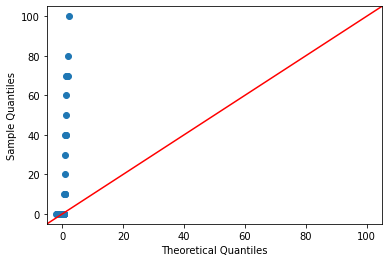

In [33]:
sm.qqplot(df['UnitsOnOrder'], line='45')
pylab.show()

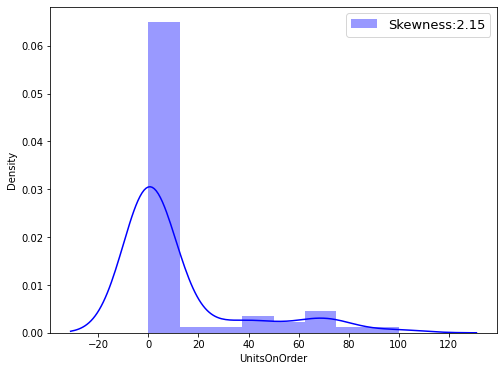

In [34]:
plt.figure(figsize=(8,6))
sns.distplot(df['UnitsOnOrder'], label='Skewness:%.2f'%(df['UnitsOnOrder'].skew()), color='blue')
plt.legend(loc = 0, fontsize = 13)
plt.show()

Outliers in UnitsOnOrder : 17<br>
From above visualization, confirmed the data shown is non-normal distribution in other word right skewed. In this situation the outliers is reasonable based on UnitsOnOrder

**TotalOrderQuantity**

In [35]:
df.sort_values('TotalOrderQuantity', ascending=True).head()

,ProductName,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,Category,CustomerCompany,CustomerCity,CustomerCountry,TotalOrderQuantity,SupplierCompany,SupplierCity,SupplierCountry
12,Genen Shouyu,24 - 250 ml bottles,15.50,39,0,Condiments,LILA-Supermercado,Barquisimeto,Venezuela,122.0,Mayumi's,Osaka,Japan
30,Gravad lax,12 - 500 g pkgs.,26.00,11,50,Seafood,Centro comercial Moctezuma,Mxico D.F.,Mexico,125.0,Svensk Sjfda AB,Stockholm,Sweden
40,Chocolade,10 pkgs.,12.75,15,70,Confections,Ernst Handel,Graz,Austria,138.0,Zaanse Snoepfabriek,Zaandam,Netherlands
58,Laughing Lumberjack Lager,24 - 12 oz bottles,14.00,52,0,Beverages,Lehmanns Marktstand,Frankfurt a.M.,Germany,184.0,Bigfoot Breweries,Bend,USA
42,Valkoinen suklaa,12 - 100 g bars,16.25,65,0,Confections,La maison d'Asie,Toulouse,France,235.0,Karkki Oy,Lappeenranta,Finland


In [36]:
q1 = df['TotalOrderQuantity'].describe()['25%']
q3 = df['TotalOrderQuantity'].describe()['75%']
iqr = q3 - q1

outlierIndex = df[(df['TotalOrderQuantity'] < q1 - (1.5 * iqr)) | (df['TotalOrderQuantity']> q3 + (1.5 * iqr)) ].index
df.loc[outlierIndex]

,ProductName,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,Category,CustomerCompany,CustomerCity,CustomerCountry,TotalOrderQuantity,SupplierCompany,SupplierCity,SupplierCountry
50,Raclette Courdavault,5 kg pkg.,55.0,79,0,Dairy Products,Richter Supermarkt,Genve,Switzerland,1496.0,Gai pturage,Annecy,France
51,Camembert Pierrot,15 - 300 g rounds,34.0,19,0,Dairy Products,Suprmes dlices,Charleroi,Belgium,1577.0,Gai pturage,Annecy,France


In [37]:
# print('Outliers in TotalOrderQuantity :', (outlierIndex.shape[0]))

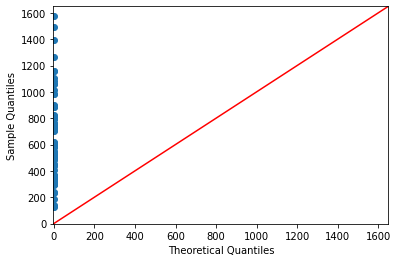

In [38]:
sm.qqplot(df['TotalOrderQuantity'], line='45')
pylab.show()

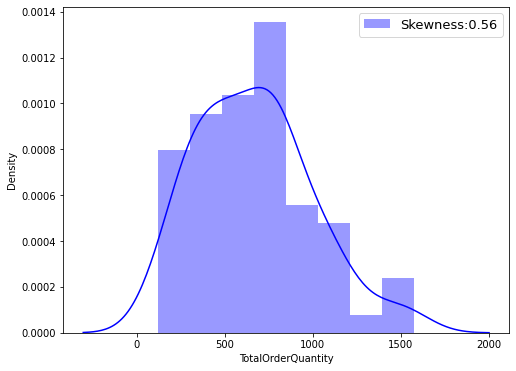

In [39]:
plt.figure(figsize=(8,6))
sns.distplot(df['TotalOrderQuantity'], label='Skewness:%.2f'%(df['TotalOrderQuantity'].skew()), color='blue')
plt.legend(loc = 0, fontsize = 13)
plt.show()

Outliers in TotalOrderQuantity : 2<br>
From above visualization, confirmed the data shown is non-normal distribution in other word right skewed. In this situation the outliers is reasonable based on TotalOrderQuantity

## **Visualization**

### **Top Products**<br>
Define and visualize top products name based on total ordered quantity

In [40]:
products = df[['ProductName','TotalOrderQuantity']].nlargest(10, 'TotalOrderQuantity')
products

,ProductName,TotalOrderQuantity
51,Camembert Pierrot,1577.0
50,Raclette Courdavault,1496.0
24,Gorgonzola Telino,1397.0
47,Gnocchi di nonna Alice,1263.0
13,Pavlova,1158.0
66,Rhnbru Klosterbier,1155.0
33,Boston Crab Meat,1103.0
53,Tarte au sucre,1083.0
1,Chang,1057.0
62,Flotemysost,1057.0


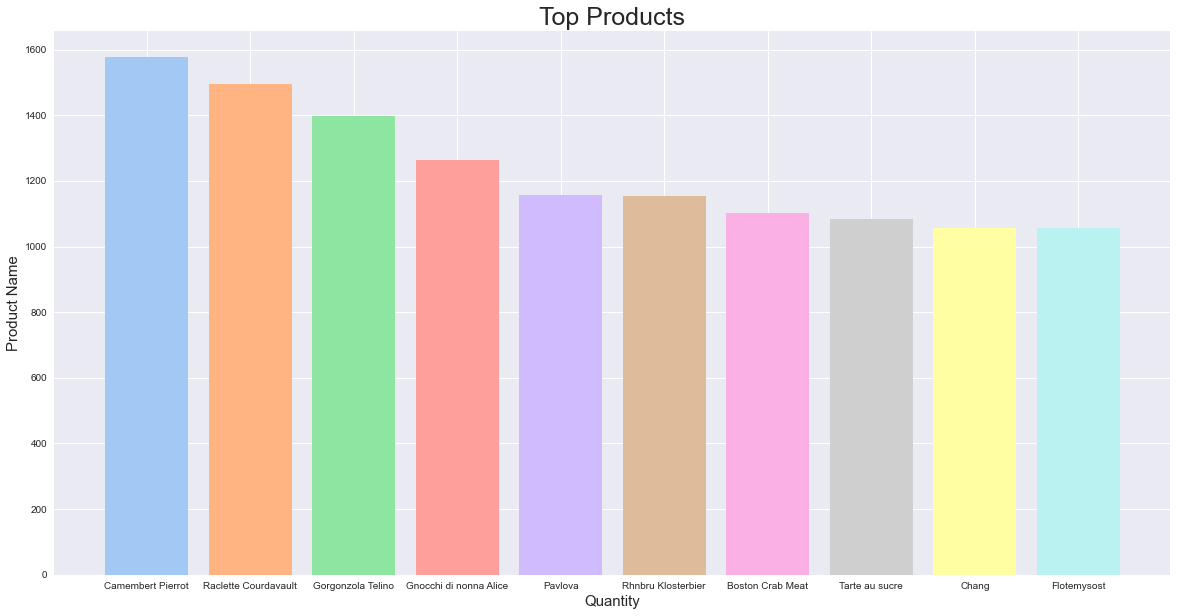

In [41]:
plt.style.use('seaborn')
plt.figure(figsize = (20,10))
plt.bar(products['ProductName'],products['TotalOrderQuantity'], color = sns.color_palette('pastel'))
plt.title('Top Products', size = 25)
plt.xlabel('Quantity', size = 15)
plt.ylabel('Product Name', size = 15)
plt.show()

**Camembert Pierrot** is the most ordered products with total 1577.<br>
From all the existing products, there must be products that are popular. therefore based on the data above, we need to increase sufficient reserves according to the most popular products and we need to keep good communication well with suppliers, so that theirs product are always available.

### **Top Products by Category**<br>
Define and visualize top products by category based on total ordered quantity

In [42]:
categories = df[['Category','TotalOrderQuantity']].groupby('Category').sum('TotalOrderQuantity')
categories

,TotalOrderQuantity
Category,
Beverages,8407.0
Condiments,5000.0
Confections,7906.0
Dairy Products,9149.0
Grains/Cereals,3865.0
Meat/Poultry,1658.0
Produce,2350.0
Seafood,7681.0


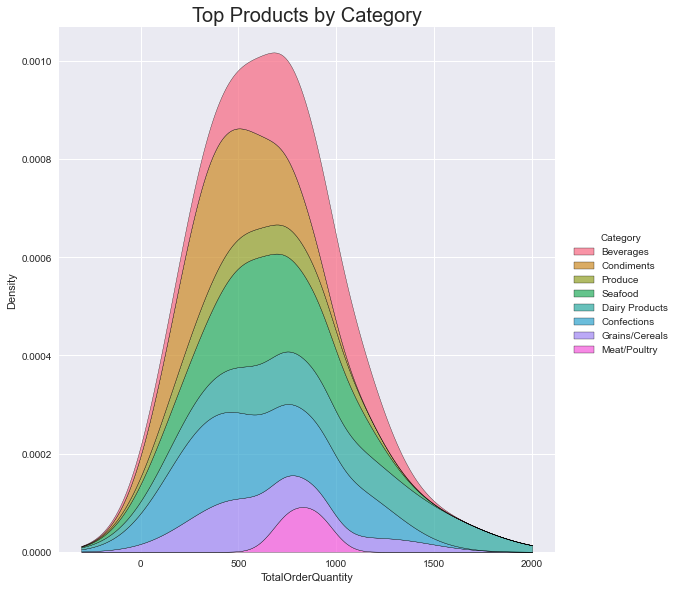

In [43]:
sns.displot(df, x='TotalOrderQuantity', hue='Category', kind='kde', multiple='stack', height=8)
plt.title('Top Products by Category', size=20)
plt.show()

**Beverages** is the dominated products category by total order quantity.
Beverages is a product category whose sales are very high. we need a special treatment to keep the other categories can meet customer needs.

### **Lowest Stock on High Ordered Products**<br>
Define and visuaize most high demand products based on total ordered quantity

In [44]:
stocks = df[df['TotalOrderQuantity'] > 1000][['ProductName','UnitsInStock','TotalOrderQuantity']].sort_values(['UnitsInStock'], ascending=True)
stocks

,ProductName,UnitsInStock,TotalOrderQuantity
24,Gorgonzola Telino,0,1397.0
17,Sir Rodney's Scones,3,1016.0
1,Chang,17,1057.0
53,Tarte au sucre,17,1083.0
51,Camembert Pierrot,19,1577.0
47,Gnocchi di nonna Alice,21,1263.0
62,Flotemysost,26,1057.0
13,Pavlova,29,1158.0
50,Raclette Courdavault,79,1496.0
33,Boston Crab Meat,123,1103.0


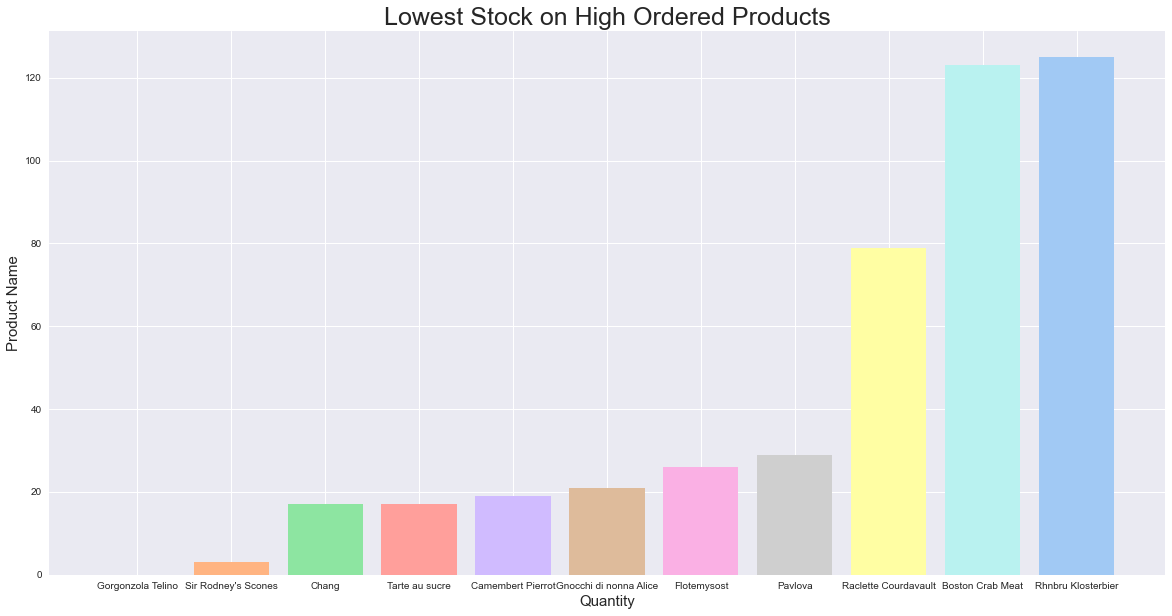

In [45]:
plt.style.use('seaborn')
plt.figure(figsize = (20,10))
plt.bar(stocks['ProductName'],stocks['UnitsInStock'], color = sns.color_palette('pastel'))
plt.title('Lowest Stock on High Ordered Products', size = 25)
plt.xlabel('Quantity', size = 15)
plt.ylabel('Product Name', size = 15)
plt.show()

Based on the visualization above, There are some products that need attention. Because all these products are the most ordered, stock addition needs to be done immediately to keep products sufficient stock if there is an order.

### **Top Customer**<br>
Define and visualize top customer based on their company total ordered quantity

In [46]:
customer = pd.DataFrame(df.groupby(['CustomerCompany'])['TotalOrderQuantity'].sum().nlargest(10)).reset_index()
customer = customer.sort_values('TotalOrderQuantity', ascending=True)
customer

,CustomerCompany,TotalOrderQuantity
9,LILA-Supermercado,1589.0
8,Ottilies Kseladen,1900.0
7,QUICK-Stop,2173.0
6,Berglunds snabbkp,2494.0
5,Rattlesnake Canyon Grocery,2560.0
4,Vins et alcools Chevalier,2569.0
3,Suprmes dlices,2645.0
2,Frankenversand,2664.0
1,Hanari Carnes,4436.0
0,Richter Supermarkt,4516.0


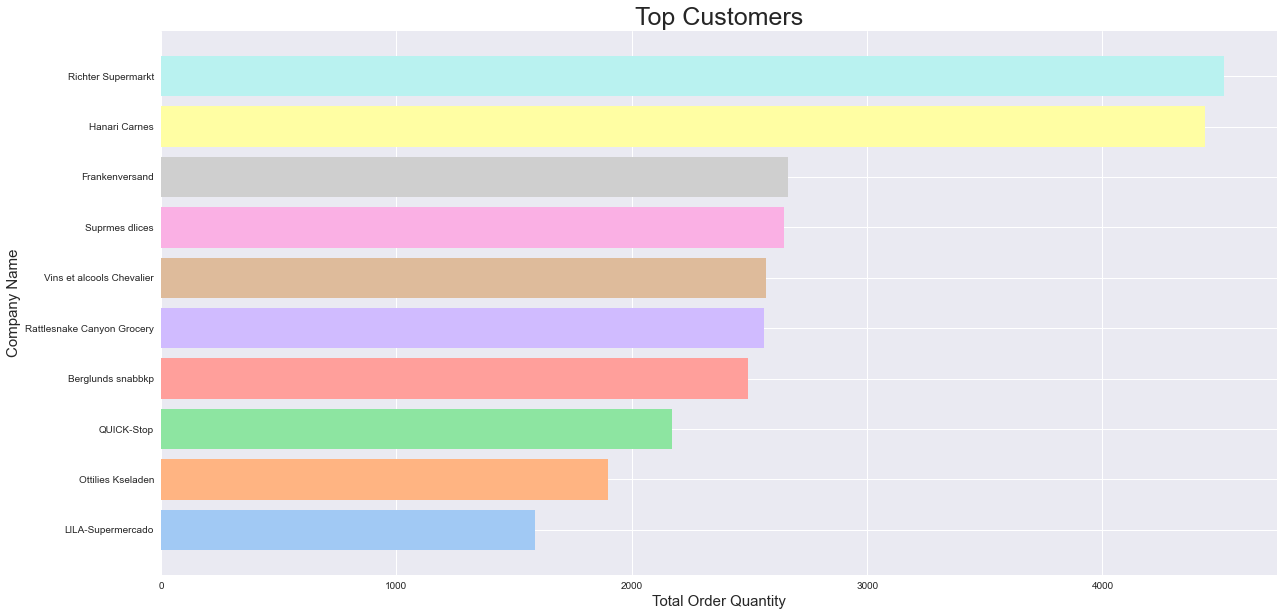

In [47]:
plt.style.use('seaborn')
plt.figure(figsize = (20,10))
plt.barh(customer['CustomerCompany'], customer['TotalOrderQuantity'], color = sns.color_palette('pastel'))
plt.title('Top Customers', size = 25)
plt.xlabel('Total Order Quantity', size = 15)
plt.ylabel('Company Name', size = 15)
plt.show()

**Richter Supermarkt** is the customer with the highest total order products
Richter Supermarkt is a very good customer in terms of ordering, we need to maintain a good relationship with this company. maybe we can give special discount for some products. We also need to do the same thing with some of the companies as listed above.

### **Top Suppliers**<br>
Define and visualize top suppliers based on their company total ordered quantity

In [48]:
customer = pd.DataFrame(df.groupby(['SupplierCompany'])['TotalOrderQuantity'].sum().nlargest(10)).reset_index()
customer = customer.sort_values('TotalOrderQuantity', ascending=True)
customer

,SupplierCompany,TotalOrderQuantity
9,Pasta Buttini s.r.l.,1697.0
8,Karkki Oy,1736.0
7,New England Seafood Cannery,2084.0
6,Exotic Liquids,2213.0
5,Formaggi Fortini s.r.l.,2500.0
4,Norske Meierier,2526.0
3,Plutzer Lebensmittelgromrkte AG,2686.0
2,"Specialty Biscuits, Ltd.",2851.0
1,"Pavlova, Ltd.",2959.0
0,Gai pturage,3073.0


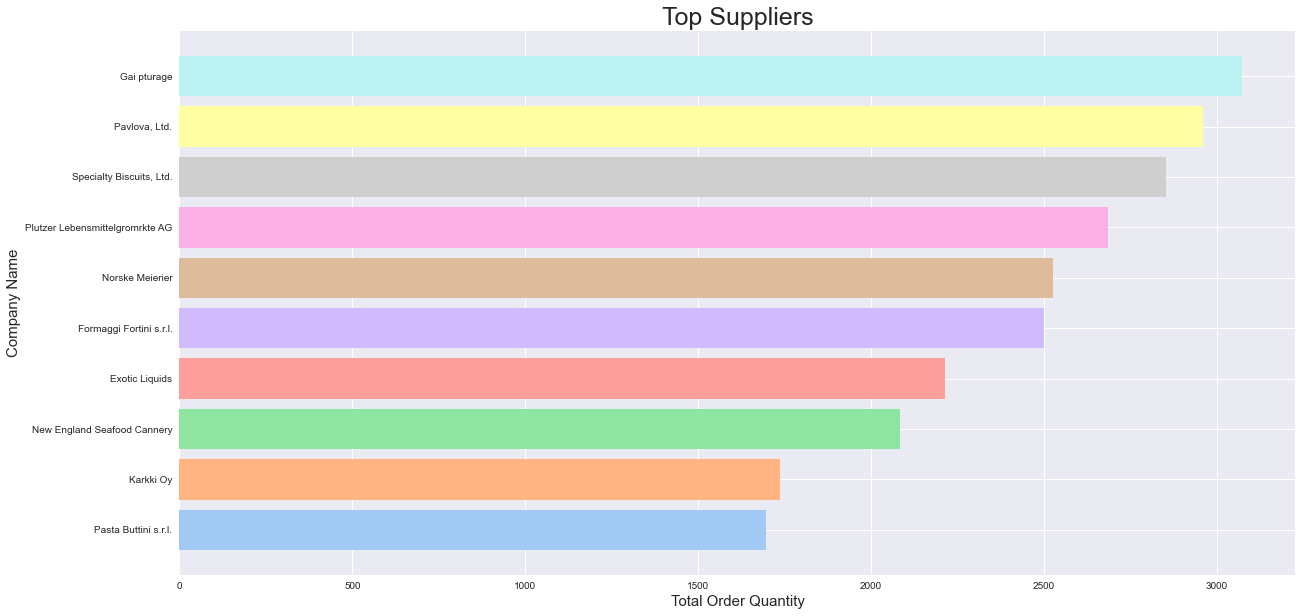

In [49]:
plt.style.use('seaborn')
plt.figure(figsize = (20,10))
plt.barh(customer['SupplierCompany'], customer['TotalOrderQuantity'], color = sns.color_palette('pastel'))
plt.title('Top Suppliers', size = 25)
plt.xlabel('Total Order Quantity', size = 15)
plt.ylabel('Company Name', size = 15)
plt.show()

**Gai pturage** is the supplier company with the highest supply products
Gai pturage is a very good supplier in terms of supply, we need to maintain a good relationship with Gai pturage and so the other companies as listed above.

### **Top Customer Country**<br>
Define and visualize top customer country based on total ordered quantity

In [50]:
cust_country = pd.DataFrame(df.groupby(['CustomerCountry'])['TotalOrderQuantity'].sum().nlargest(10)).reset_index()
cust_country

,CustomerCountry,TotalOrderQuantity
0,Germany,8529.0
1,Brazil,7164.0
2,Switzerland,5716.0
3,France,3586.0
4,USA,3555.0
5,Mexico,3071.0
6,Belgium,2645.0
7,Sweden,2494.0
8,Venezuela,1954.0
9,Italy,1793.0


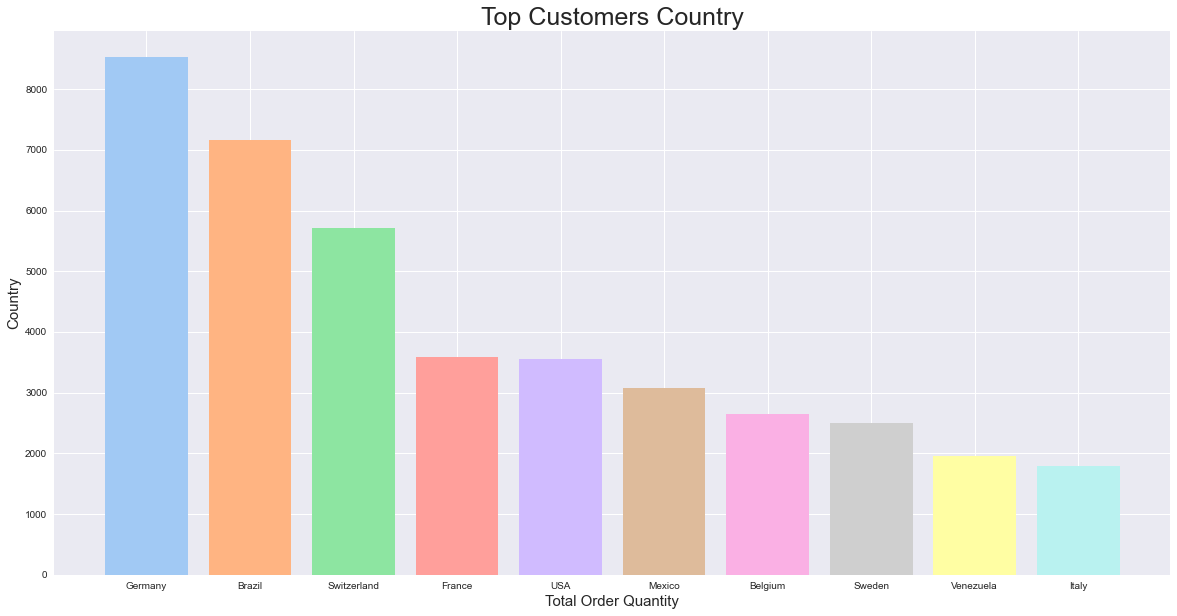

In [51]:
plt.style.use('seaborn')
plt.figure(figsize = (20,10))
plt.bar(cust_country['CustomerCountry'], cust_country['TotalOrderQuantity'], color = sns.color_palette('pastel'))
plt.title('Top Customers Country', size = 25)
plt.xlabel('Total Order Quantity', size = 15)
plt.ylabel('Country', size = 15)
plt.show()

**Germany** the country with the most highest total order compared to the other countries.<br>
From this data, we need to maintain good relations with customers who are in different countries. therefore maybe we can assign a salesperson that who has the language skills according to the country they work in, in order to improve relations and good communication.

### **Top Supplier Country**<br>
Define and visualize top customer country based on total ordered quantity

In [52]:
supp_country = pd.DataFrame(df.groupby(['SupplierCountry'])['TotalOrderQuantity'].sum().nlargest(10)).reset_index()
supp_country

,SupplierCountry,TotalOrderQuantity
0,USA,6530.0
1,UK,5064.0
2,France,5023.0
3,Germany,4734.0
4,Australia,4345.0
5,Italy,4197.0
6,Canada,3344.0
7,Norway,2526.0
8,Japan,2456.0
9,Finland,1736.0


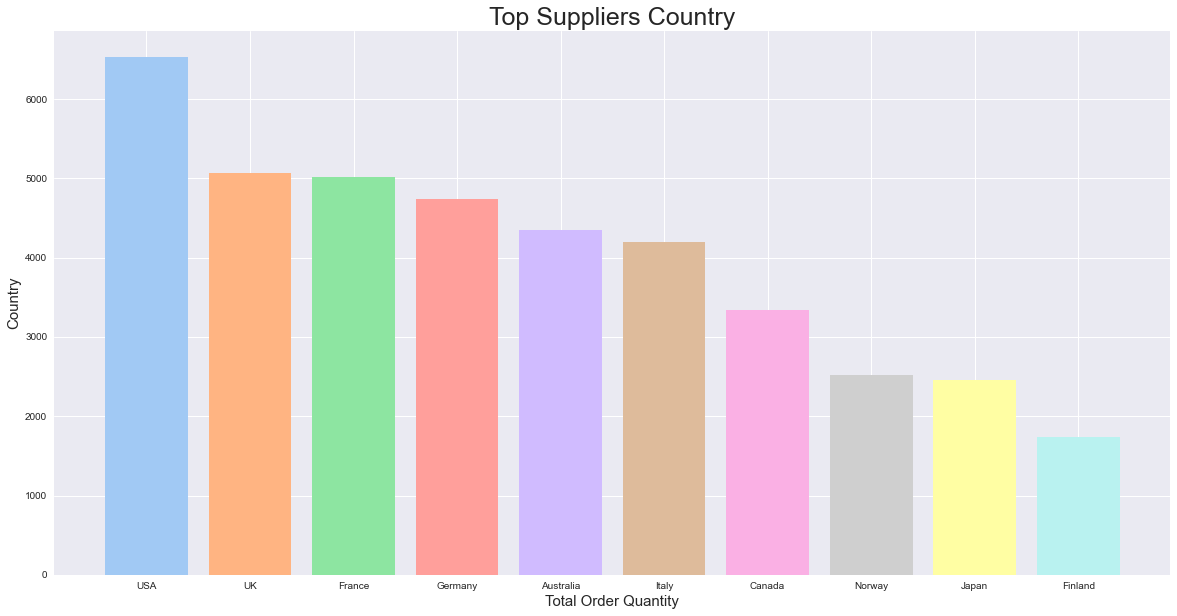

In [53]:
plt.style.use('seaborn')
plt.figure(figsize = (20,10))
plt.bar(supp_country['SupplierCountry'], supp_country['TotalOrderQuantity'], color = sns.color_palette('pastel'))
plt.title('Top Suppliers Country', size = 25)
plt.xlabel('Total Order Quantity', size = 15)
plt.ylabel('Country', size = 15)
plt.show()

**United States** is the highest supplier of products, followed by United Kingdom at second place.<br>
From this data, we can improve shipping performance by selecting more shipper companies that we used to. It would be better if we communicate and cooperation with the sippher company to ensure that we have reserves in case of problems in terms of shipping method sea, air and land freight.

### **Tableau Visualization**

In [54]:
df.to_csv('northwind_products.csv')

In [55]:
%%HTML
<div class='tableauPlaceholder' id='viz1649016572981' style='position: relative'><noscript><a href='#'><img alt='Northwind Products ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pr&#47;ProjectModule2_16490125235130&#47;NorthwindProducts&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='ProjectModule2_16490125235130&#47;NorthwindProducts' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pr&#47;ProjectModule2_16490125235130&#47;NorthwindProducts&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1649016572981');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.height='1777px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

With this Analyzing, i hope that audience understand what the data tells and to find the insight. and i feel sorry if theres some errors in data analyzing.<br>
## **`Thank You in Advance`**
<br>
<br>
James Nainggolan